In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
E_artykuł = np.array([-12.258438, -6.045418, -5.286089, -0.646627, 0.691204, 4.053229, 7.368937, 11.235521, 15.431918, 19.938752, 24.722016, 29.758660, 35.029816, 40.519900, 46.215701, 52.105824, 58.180283, 64.430175, 70.847383, 77.424233, 84.152963, 91.024978, 98.029195, 105.149081, 112.356276, 119.592224, 126.704585])
E_SM = np.load("energie własne E dla asymetrycznej studni 1D SM.npy")
E_FD = np.load("energie własne E dla asymetrycznej studni 1D FD.npy")
energy_levels = range(len(E_SM))

In [3]:
roźnica_SM = np.ones(len(E_artykuł))
roźnica_FD = np.ones(len(E_artykuł))
for i in range(len(E_artykuł)):
    roźnica_SM[i] = np.abs(E_artykuł[i] - E_SM[i])
    roźnica_FD[i] = np.abs(E_artykuł[i] - E_FD[i])

energy_levels = range(len(E_artykuł)) # wektor poziomów energetycznych od 0 do len(roźnica)

In [4]:
E_SM

array([-12.25821544,  -6.04606498,  -5.28538413,  -0.64468017,
         0.69281606,   4.05159452,   7.36587212,  11.236595  ,
        15.42951023,  19.93521799,  24.72061697,  29.7560276 ,
        35.02676241,  40.51485127,  46.20953611,  52.09824386,
        58.17178674,  64.42468511,  70.8410867 ,  77.41428753,
        84.14243942,  91.01498528,  98.01897115, 105.13735485,
       112.34117397, 119.57724237, 126.6803869 ])

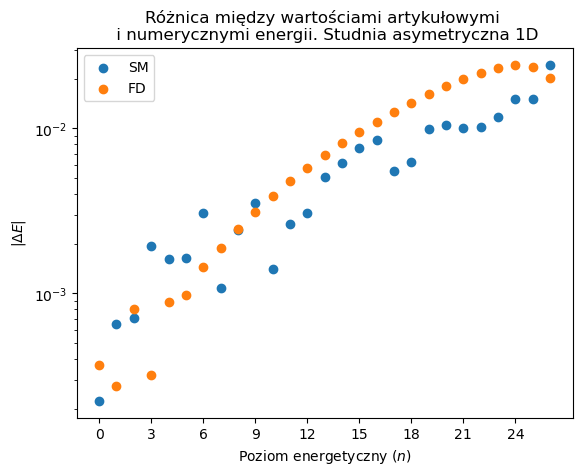

In [5]:
plt.scatter(energy_levels, roźnica_SM, label='SM')
plt.scatter(energy_levels, roźnica_FD, label='FD')
plt.xlabel('Poziom energetyczny ($n$)')
plt.ylabel('$|\Delta E|$')
plt.title('Różnica między wartościami artykułowymi \n i numerycznymi energii. Studnia asymetryczna 1D')
plt.yscale('log')
plt.xticks(np.arange(min(energy_levels), max(energy_levels) + 1, 3))  
plt.legend()
plt.savefig("Różnica energii. Asymetryczna studnia.pdf", bbox_inches='tight')  # dpi=300 - wysoka jakość
plt.show()

In [23]:
#psi_E_An = np.load("funkcje psi(E) dla studni kwadratowej skończonej 1D Anal.npy")
#psi_E_An /= np.linalg.norm(psi_E_An)

psi_E_SM = np.load("funkcje psi(E) dla asymetrycznej studni 1D SM.npy")
for i in range(len(psi_E_SM)):
    psi_E_SM[i] /= np.linalg.norm(psi_E_SM[i])

psi_E_FD = np.load("funkcje psi(E) dla asymetrycznej studni 1D FD.npy")
for i in range(len(psi_E_FD[0])):
    psi_E_FD[:, i] /= np.linalg.norm(psi_E_FD[:, i])

In [24]:
x_An = np.linspace(-12.5, 12.5, 1000)

N_SM = 2**8            # liczba punktów siatki - 1 w każdym kierunku
L_SM= 10           # długość boku obszaru
x_SM = np.linspace(-L_SM/2, L_SM/2, N_SM)

N_FD = 2**12
x_max = 7
x_FD = np.linspace(-x_max, x_max, N_FD)

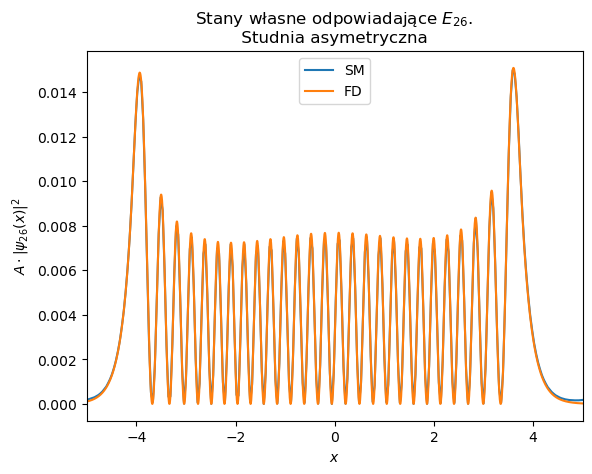

In [57]:

plt.plot(x_SM, 1.0*np.abs(psi_E_SM[26])**2, label='SM')
plt.plot(x_FD, 11.47*np.abs(psi_E_FD[:, 26])**2, label='FD')
#plt.plot(x_An, 1*np.abs(psi_E_An)**2, color='green', label='Analityczny')
plt.xlim(-5, 5)
#plt.ylim(0, 0.002)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$A\cdot|\psi_{26}(x)|^2$')
plt.title('Stany własne odpowiadające $E_{26}$. \n Studnia asymetryczna ')
plt.savefig("Stany własne dla E_26. Asymetryczna studnia.pdf", bbox_inches='tight')
plt.show()

In [6]:

from scipy.fft import fft, ifft, fftfreq

In [7]:

dt = 0.018         # krok czasowy
Nt = 2**15
T_max = Nt * dt       # maksymalny czas
t_values = np.arange(Nt) * dt

window = (1 - np.cos(2 * np.pi * t_values / T_max)) / T_max

In [9]:
# Stosujemy okno czasowe Hann jak wcześniej
psi_t_windowed = psi_t * window[:, np.newaxis]


In [24]:
np.save("funkcje psi(t)_windowed dla studni gładkiej skończonej 1D.npy", psi_t_windowed)

NameError: name 'psi_t_windowed' is not defined

In [3]:
psi_t_windowed = np.load("funkcje psi(t)_windowed dla studni kwadratowej skończonej 1D.npy")

In [6]:

psi_E = fft(psi_t_windowed, axis=0)  # shape: (Nt, Nx)


In [29]:
np.save("funkcje psi(t)_E dla studni kwadratowej skończonej 1D.npy", psi_E)

In [17]:
results = ([0.714035, 2.726324, 4.992207])

In [18]:
for r in results:
    print(r)

0.714035
2.726324
4.992207


In [21]:
eigen_psi = []

for r in results:
    # Znajduję najbliższy indeks na osi energii
    idx = np.argmin(np.abs(E + r))
    psi_n = psi_E[idx, :]  # Funkcja falowa dla En (do normowania)
    eigen_psi.append(psi_n)


In [23]:
eigen_psi_norm = [ψn / np.linalg.norm(ψn) for ψn in eigen_psi]

In [27]:

N = 2**14            # liczba punktów siatki - 1 w każdym kierunku
L = 1800           # długość boku obszaru
x = np.linspace(-L/2, L/2, N)

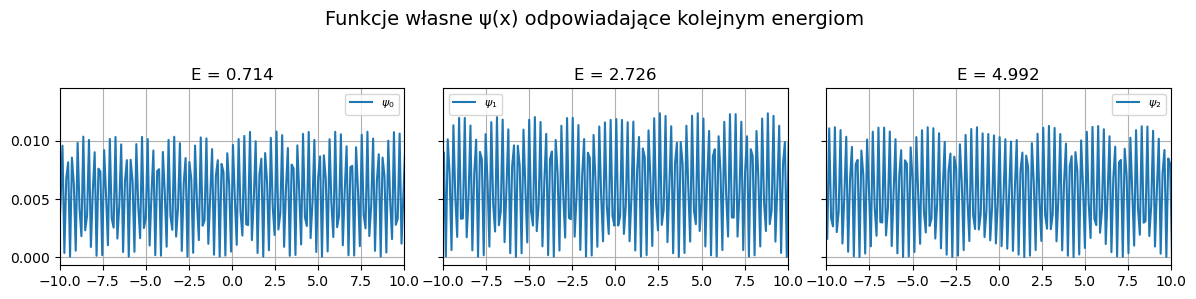

In [28]:
num_states = len(eigen_psi_norm)
cols = 3
rows = (num_states + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3), sharex=True, sharey=True)
axes = axes.flatten()

for i, ψn in enumerate(eigen_psi_norm):
    ax = axes[i]
    ax.plot(x, 100*np.abs(ψn)**2, label=r"$\psi_{%d}$" % i)
    ax.set_title(f"E = {(results[i]):.3f}")
    ax.grid(True)
    ax.legend(fontsize=8)
    ax.set_xlim(-10, 10)
    #ax.set_ylim(-145, -95)

# Jeśli są puste komórki, wyłącz je
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Funkcje własne ψ(x) odpowiadające kolejnym energiom", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
